In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Obesity prediction.csv")
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

# DATA VISUALISATION

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

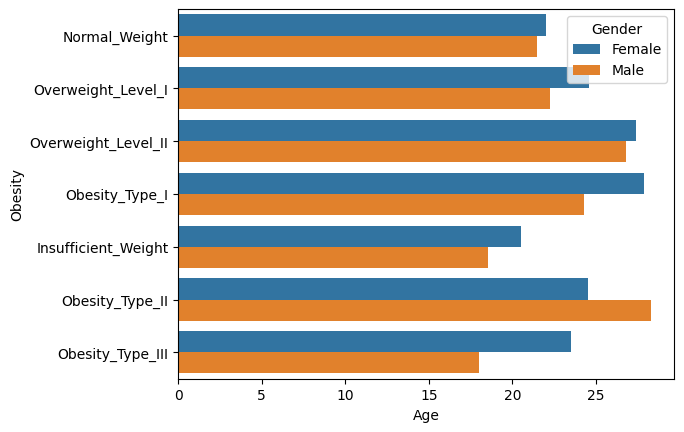

In [4]:
sns.barplot(data=df,x='Age',y='Obesity',hue='Gender',errorbar=None)
df['Obesity'].value_counts()

([<matplotlib.patches.Wedge at 0x1d1a0823df0>,
 [Text(-1.0830508600621884, 0.19235600983217044, 'Obesity_Type_I'),
  Text(-0.7433667936036408, -0.810805654992269, 'Obesity_Type_III'),
  Text(0.19924792217476933, -1.0818041715158235, 'Obesity_Type_II'),
  Text(0.9572772063262621, -0.5418674655745508, 'Overweight_Level_I'),
  Text(1.0340343012012645, 0.3751973666474922, 'Overweight_Level_II'),
  Text(0.3916468632222517, 1.0279166962979884, 'Normal_Weight'),
  Text(-0.4960896170345878, 0.9817815907168337, 'Insufficient_Weight')],
 [Text(-0.5907550145793755, 0.1049214599084566, '16.6%'),
  Text(-0.40547279651107676, -0.44225762999578305, '15.3%'),
  Text(0.10868068482260144, -0.5900750026449946, '14.1%'),
  Text(0.5221512034506884, -0.29556407213157315, '13.7%'),
  Text(0.5640187097461442, 0.20465310908045026, '13.7%'),
  Text(0.2136255617575918, 0.5606818343443573, '13.6%'),
  Text(-0.2705943365643206, 0.535517231300091, '12.9%')])

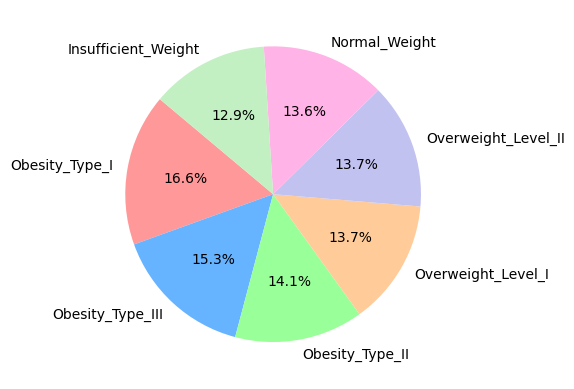

In [5]:
Obesity_count = df['Obesity'].value_counts()
plt.pie(Obesity_count, 
        labels=Obesity_count.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']
       )

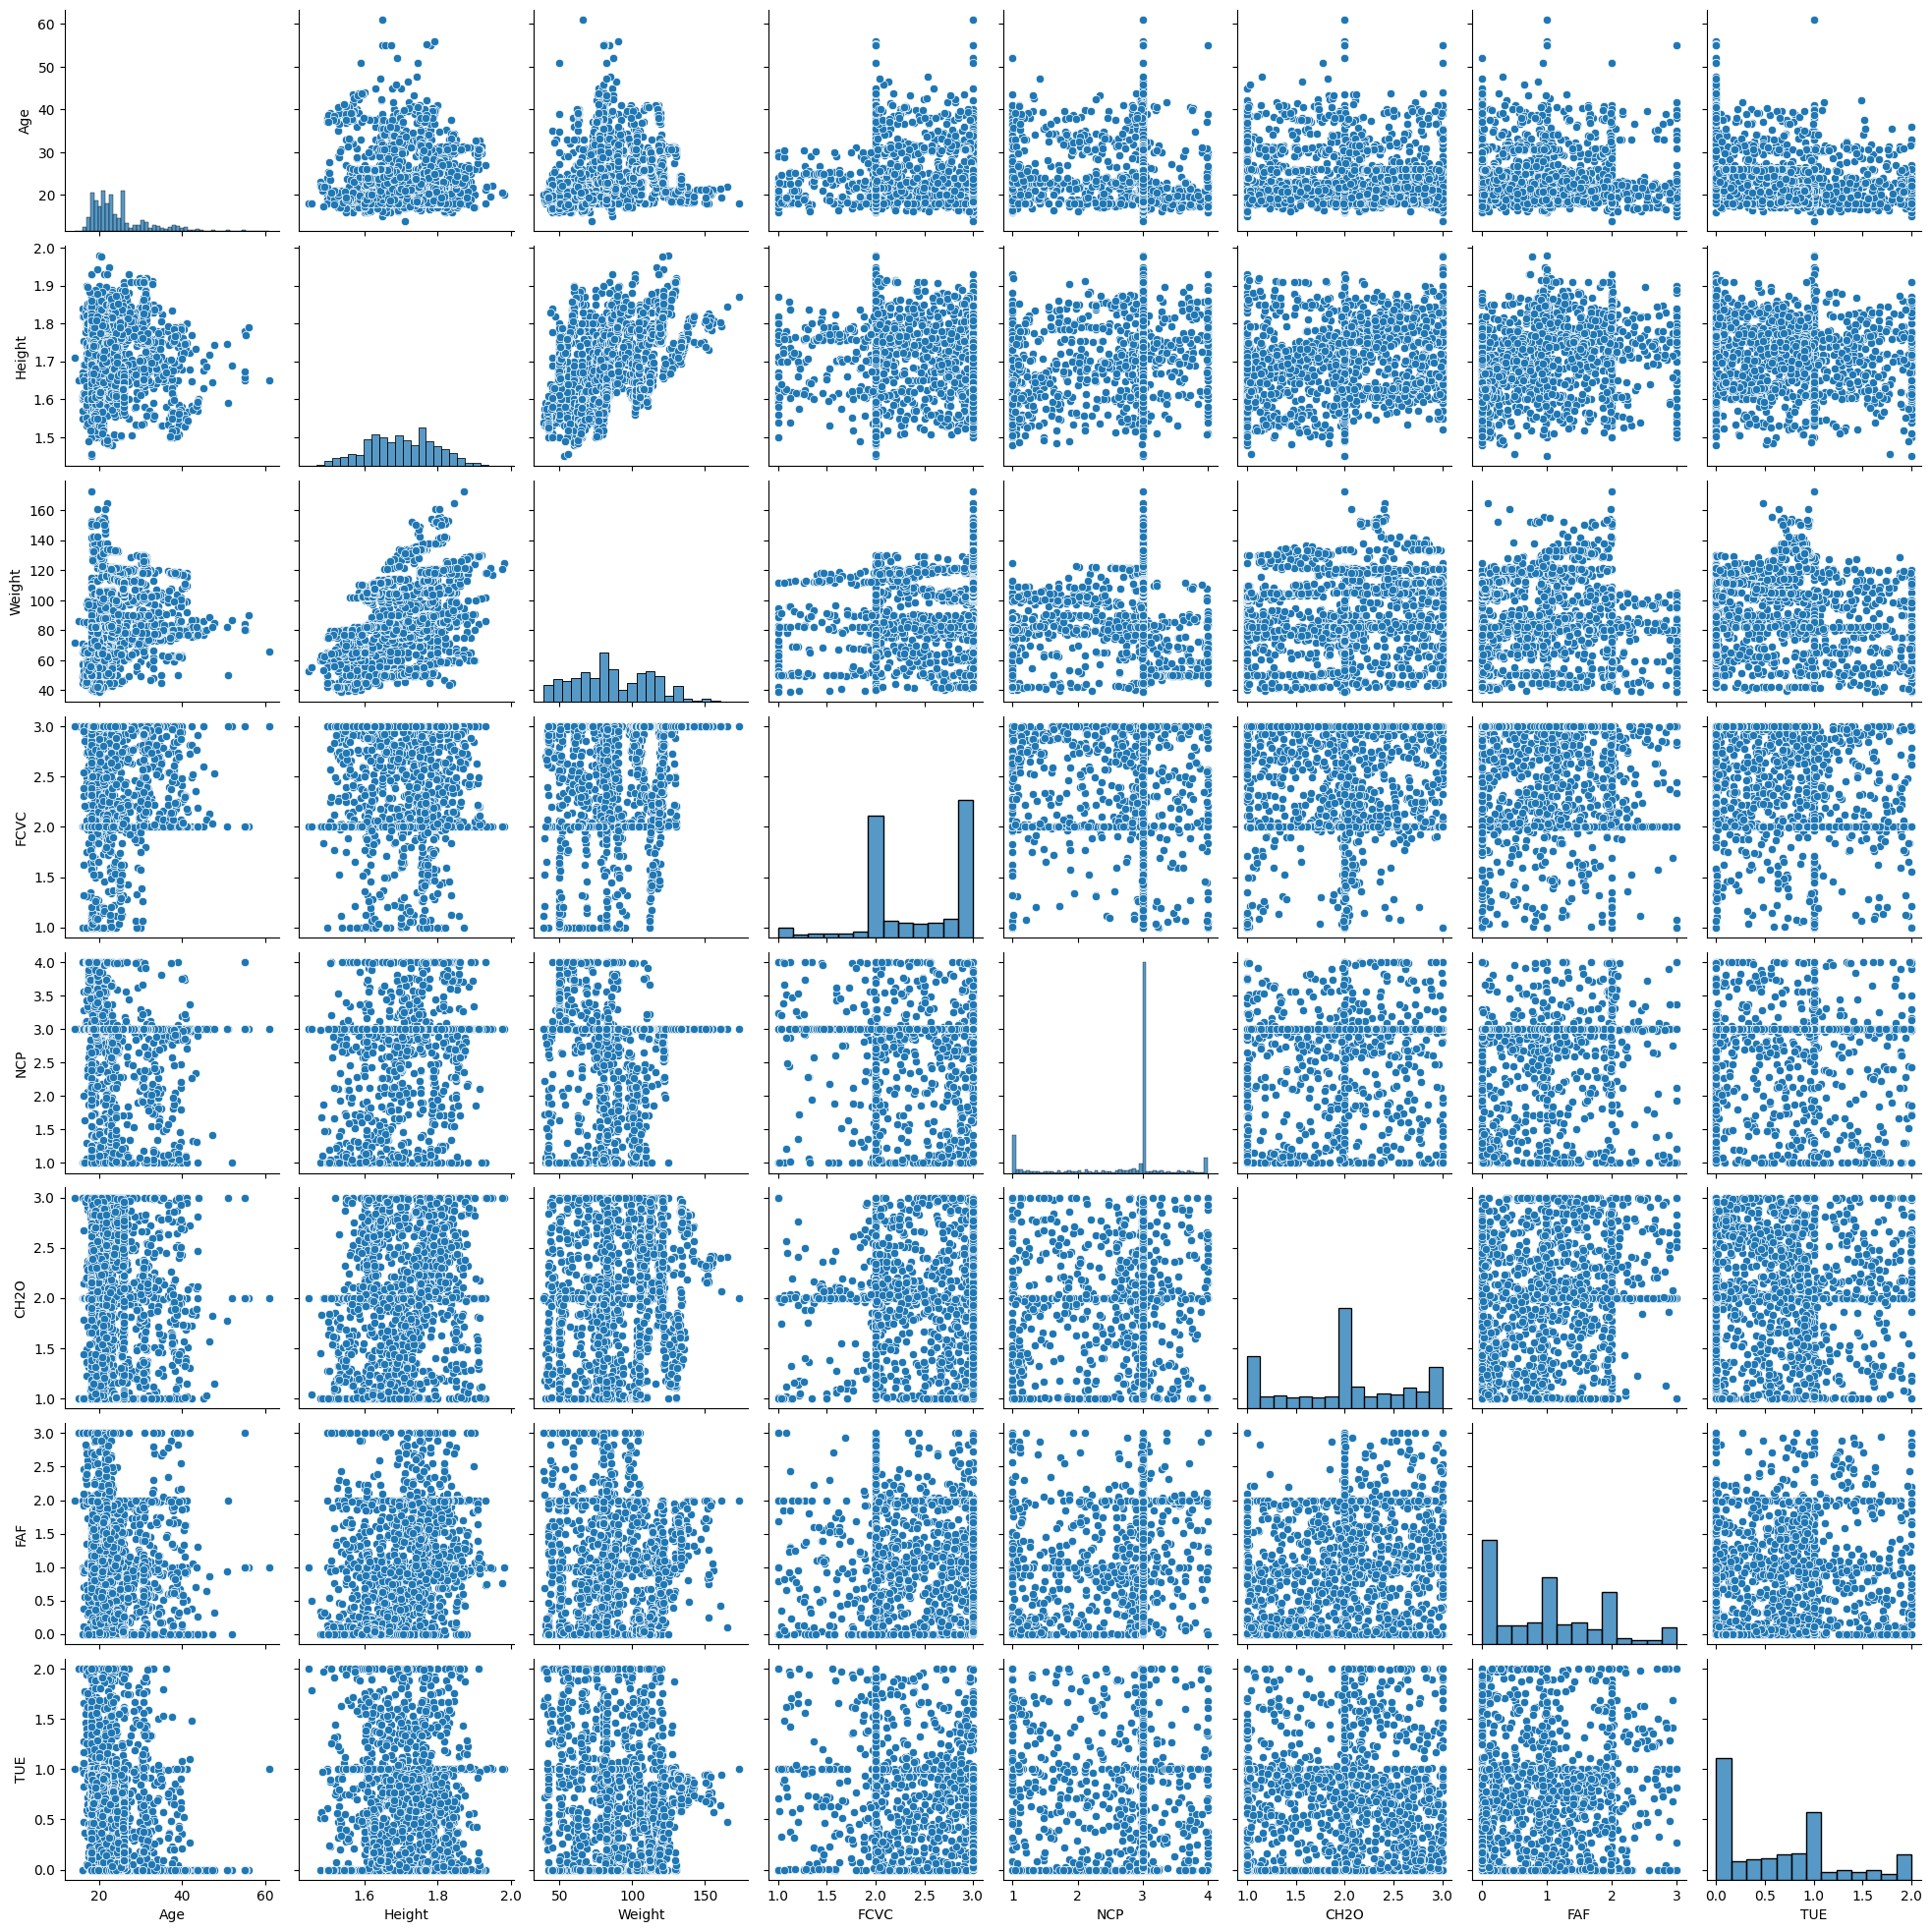

In [6]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='MTRANS'>

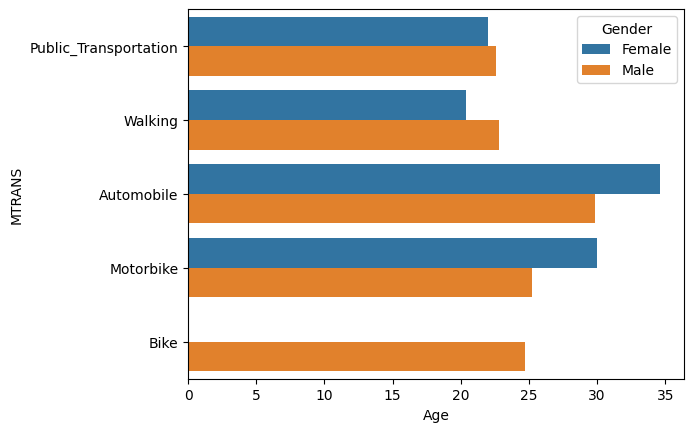

In [7]:
sns.barplot(data=df,x='Age',y='MTRANS',hue='Gender',errorbar=None)

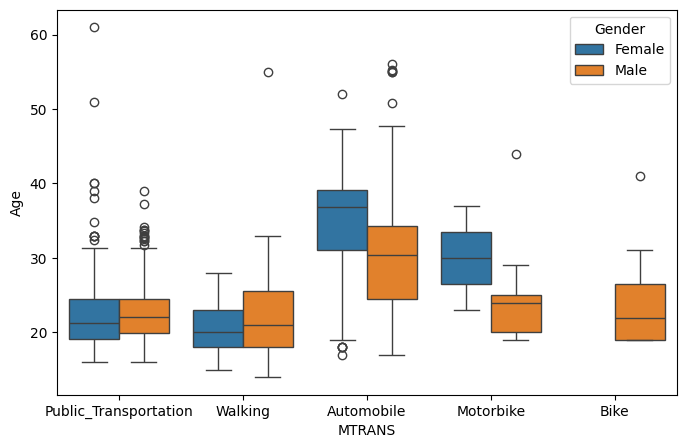

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='MTRANS',y='Age',hue='Gender')
transport_count = df['MTRANS'].value_counts()

([<matplotlib.patches.Wedge at 0x1d1a53dec50>,
 [Text(0.09057024011620025, -1.0962650371170715, 'Public_Transportation'),
  Text(0.030462528391777578, 1.0995781165356013, 'Automobile'),
  Text(-0.7382581112460485, 0.8154599690845757, 'Walking'),
  Text(-0.8157650234210084, 0.7379210164800307, 'Motorbike'),
  Text(-0.8352372364640837, 0.7158063696446413, 'Bike')],
 [Text(0.04940194915429104, -0.5979627475184025, '74.8%'),
  Text(0.016615924577333224, 0.5997698817466915, '21.6%'),
  Text(-0.40268624249784457, 0.4447963467734049, '2.7%'),
  Text(-0.4449627400478227, 0.4025023726254712, '0.5%'),
  Text(-0.4555839471622274, 0.3904398379879861, '0.3%')])

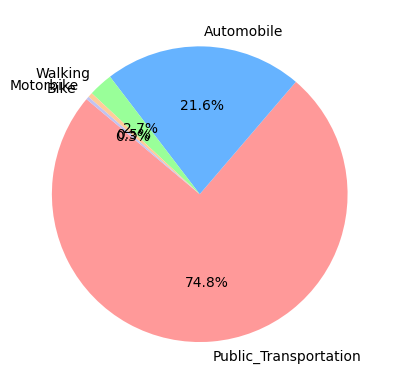

In [9]:
# plt.figure(figsize=(15,9))
plt.pie(transport_count, 
        labels=transport_count.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        # rotatelabels=45,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']
       )

# CORELATIONAL MATIX

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

<Axes: >

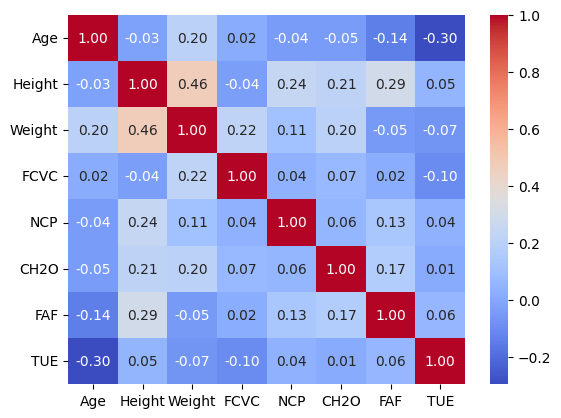

In [11]:
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt='.2f'
           )

# MACHINE_LEARNIGN ALGORITHM

### USING RANDOM_FOREST_CLASSIFIER

In [12]:
df['BMI'] = df['Weight'] / df['Height']
# df.head()

In [13]:
x = df[['Age','FAF','BMI']]
y = df['Obesity']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("\nClassification_report:\n",classification_report(y_test,y_pred))

Accuracy:  89.12529550827422

Classification_report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.95        56
      Normal_Weight       0.87      0.87      0.87        62
     Obesity_Type_I       0.87      0.94      0.90        78
    Obesity_Type_II       0.95      0.98      0.97        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.83      0.77      0.80        56
Overweight_Level_II       0.77      0.66      0.71        50

           accuracy                           0.89       423
          macro avg       0.89      0.88      0.88       423
       weighted avg       0.89      0.89      0.89       423



In [17]:
data = pd.DataFrame({'Age':[21] ,'FAF':[0.000000] ,'BMI':[39.506173]})
data_pred = model.predict(data)
print("The Obesity types is ",data_pred[0])

The Obesity types is  Normal_Weight


In [18]:
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

#### USING LOGISTIC_REGRESSION

In [19]:
x = df[['Age','BMI']]
y = df['SMOKE']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("\nclassification_report:\n",classification_report(y_test,y_pred))

accuracy_score:  0.9881796690307328

classification_report:
               precision    recall  f1-score   support

          no       0.99      1.00      0.99       418
         yes       0.00      0.00      0.00         5

    accuracy                           0.99       423
   macro avg       0.49      0.50      0.50       423
weighted avg       0.98      0.99      0.98       423



C:\Users\Omkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [22]:
data_1 = pd.DataFrame({'Age':[34] ,'BMI':[48.333333]})
data_1_pred = model.predict(data_1)
print("This person is a smoker:",data_1_pred[0])

This person is a smoker: no


### PCA USING SCALE

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [24]:
X = df.drop(columns=['Obesity'])
y = df.Obesity

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.svm import SVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

In [30]:
class_labels = label_encoders["Obesity"].classes_

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print("Accuracy_score: ",accuracy_score(y_test, y_pred))
    print(f"Classification Report for {name}:\n")
    y_pred = model.predict(X_test_scaled)
    classification_results = classification_report(y_test, y_pred, target_names=class_labels)
    print(classification_results)

Accuracy_score:  0.9645390070921985
Classification Report for Logistic Regression:

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        56
      Normal_Weight       0.94      0.71      0.81        62
     Obesity_Type_I       0.97      0.92      0.95        78
    Obesity_Type_II       0.92      0.98      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.79      0.80      0.80        56
Overweight_Level_II       0.77      0.88      0.82        50

           accuracy                           0.90       423
          macro avg       0.90      0.90      0.89       423
       weighted avg       0.91      0.90      0.90       423

Accuracy_score:  0.900709219858156
Classification Report for Random Forest:

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.98      0.98        56
      Normal_Weight       0.93      0.90  

In [33]:
data2 = pd.DataFrame({'Gender':[0],
                      'Age':[21], 
                      'Height':[1.62], 
                      'Weight':[64], 
                      'family_history':[1], 
                      'FAVC':[0], 
                      'FCVC':[2],
                      'NCP':[3], 
                      'CAEC':[2],
                      'SMOKE':[0],
                      'CH2O':[2],
                      'SCC':[0], 
                      'FAF':[0],
                      'TUE':[1],
                      'CALC':[3], 
                      'MTRANS':[3], 
                      'BMI':[39.506173], 
                     })
data2_pred = model.predict(data2)
print("This person have Obesity type",data2_pred[0])

This person have Obesity type 4


C:\Users\Omkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
